In [2]:
# Import libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()

Saving msc_training_dataset.csv to msc_training_dataset.csv


In [4]:
import io
training_df = pd.read_csv(io.BytesIO(uploaded['msc_training_dataset.csv']))

In [5]:
from google.colab import files
uploaded = files.upload()

Saving msc_testing_dataset.csv to msc_testing_dataset.csv


In [6]:
import io
testing_df = pd.read_csv(io.BytesIO(uploaded['msc_testing_dataset.csv']))

In [7]:
training_df.describe()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2.990000,1.489000,1.522000,1.998333,0.490333,0.488667,0.485000,0.495667,0.512333,0.480667,0.499667,8606.600000
std,1.424281,0.499962,0.499599,0.813153,0.499990,0.499955,0.499858,0.500065,0.499931,0.499709,0.500083,2216.248563
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2235.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7005.000000
50%,3.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,8615.000000
75%,4.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10215.000000
max,5.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15035.000000


In [8]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   room          3000 non-null   int64
 1   bathroom      3000 non-null   int64
 2   kitchen       3000 non-null   int64
 3   french_door   3000 non-null   int64
 4   backyard      3000 non-null   int64
 5   furnished     3000 non-null   int64
 6   green_paint   3000 non-null   int64
 7   solar_power   3000 non-null   int64
 8   woodfloor     3000 non-null   int64
 9   qlm_security  3000 non-null   int64
 10  club_access   3000 non-null   int64
 11  price         3000 non-null   int64
dtypes: int64(12)
memory usage: 281.4 KB


In [9]:
testing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   room          999 non-null    int64
 1   bathroom      999 non-null    int64
 2   kitchen       999 non-null    int64
 3   french_door   999 non-null    int64
 4   backyard      999 non-null    int64
 5   furnished     999 non-null    int64
 6   green_paint   999 non-null    int64
 7   solar_power   999 non-null    int64
 8   woodfloor     999 non-null    int64
 9   qlm_security  999 non-null    int64
 10  club_access   999 non-null    int64
 11  price         999 non-null    int64
dtypes: int64(12)
memory usage: 93.8 KB


In [11]:
X_train = training_df.drop("price", axis='columns')
y_train = training_df['price']

In [12]:
X_test = testing_df.drop("price", axis='columns')
y_test = testing_df['price']

In [13]:
# Create the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

In [14]:
# Determine feature importance
coefficients = pd.DataFrame(model.coef_, X_train.columns)
coefficients.columns = ['Coefficient']
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)
print(coefficients)

              Coefficient
furnished          2000.0
woodfloor          1890.0
solar_power        1530.0
room               1000.0
club_access         730.0
backyard            560.0
kitchen             500.0
qlm_security        440.0
green_paint         370.0
bathroom            300.0
french_door         240.0


In [15]:
# Predict the house prices in the test set
y_pred = model.predict(X_test)
y_pred

array([ 5055.,  7645., 11305.,  8845., 11165., 11375., 11735.,  6835.,
        7815.,  5895.,  9095.,  8295.,  6695., 11305.,  7205.,  9165.,
        8775., 12745.,  9745.,  6655.,  9325.,  7785.,  7075.,  4315.,
        9965.,  6855.,  7335.,  8895.,  6325.,  9695.,  6645., 10305.,
       10485.,  8195.,  7565., 10355.,  9475., 11115.,  9765., 12825.,
        6295.,  5125.,  9825.,  8895., 11715.,  6205.,  4095., 11475.,
        9565.,  5535., 11455., 10395.,  4125.,  7735., 13055.,  9595.,
        6445.,  8365., 10155.,  7835.,  8275., 14305.,  7075.,  8435.,
       12625.,  7095., 11435., 10555., 10095.,  5535.,  8235., 12095.,
        4215.,  5865.,  9355.,  9245.,  7065., 11625., 10855., 10825.,
        8785.,  7355., 11865.,  8315., 11805.,  5945.,  8775.,  8275.,
        7165.,  8245.,  7575., 11925., 11965.,  7975.,  6645., 10795.,
       11235.,  8195.,  9355.,  7445.,  7235.,  8935.,  4575.,  9675.,
        5735.,  5075., 10645.,  9705.,  8605., 12515.,  8165.,  6105.,
      

In [16]:
# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error: ", mse)
print("R-squared: ", r2)

Mean squared error:  169.00000000001216
R-squared:  0.9999656095212318


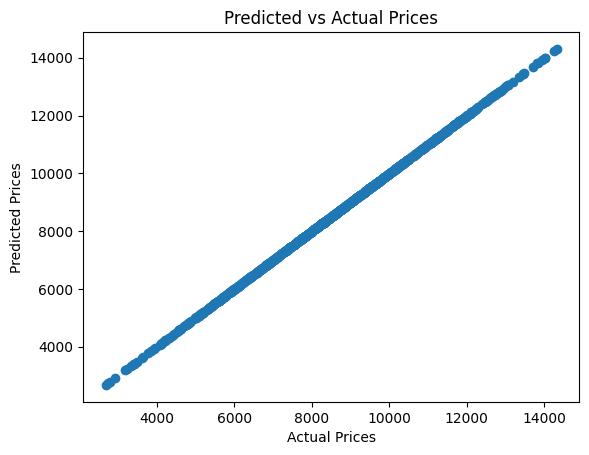

In [17]:
# Visualize the predicted house prices and the actual house prices in the test set
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')
plt.show()